In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
heart = pd.read_csv("heart-disease.csv")
heart.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [3]:
x = heart.drop("target",axis =1)#feautres data
y = heart["target"]#label data

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

In [6]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [7]:
clf.score(x_test,y_test)

0.8524590163934426

In [8]:
c = clf.predict(x_test)
c

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [9]:
z = np.array(y_test)
z

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [11]:
np.mean(z == c)

np.float64(0.8524590163934426)

In [12]:
x_test.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3


In [19]:
age = input("enter age")
sex = input("enter sex (1 or 0)")
cp = input("enter cp")
trestbps = input("enter trestbps")
chol = input("enter chol")
fbs = input("enter fbs")
restecg = input("enter restecg")
exang = input("enter exang")
oldpeak = input("enter oldpeak")
slope = input("enter slope")
ca = input("enter ca")
thalach = input("enter thalach")
thal = input("enter thal")

detail = pd.DataFrame([[age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]])
clf.predict(detail)

enter age 12
enter sex (1 or 0) 12
enter cp 12
enter trestbps 12
enter chol 12
enter fbs 12
enter restecg 12
enter exang 12
enter oldpeak 12
enter slope 12
enter ca 12
enter thalach 12
enter thal 12


c:\users\shanm\desktop\sample_project_1\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
"hi"

'hi'

In [24]:
from sklearn.model_selection import cross_val_score


In [25]:
clf.score(x_test,y_test)

0.8524590163934426

In [29]:
np.mean(cross_val_score(clf,x_test,y_test,cv =5))

np.float64(0.8038461538461539)

classification models

In [32]:
y_prob = clf.predict_proba(x_test)
y_prob[:10]

array([[0.88, 0.12],
       [0.43, 0.57],
       [0.46, 0.54],
       [0.84, 0.16],
       [0.28, 0.72],
       [0.16, 0.84],
       [0.21, 0.79],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.51, 0.49]])

In [42]:
y_probs_postive = y_prob[:, 1]
y_probs_postive
from sklearn.metrics import roc_curve

In [43]:
fpr,tpr,thresholds = roc_curve(y_test,y_probs_postive)

In [44]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.20689655, 0.20689655,
       0.27586207, 0.27586207, 0.48275862, 0.5862069 , 0.62068966,
       0.75862069, 0.79310345, 0.86206897, 0.89655172, 0.96551724,
       1.        ])

In [45]:
tpr

array([0.     , 0.0625 , 0.34375, 0.46875, 0.5    , 0.5625 , 0.625  ,
       0.65625, 0.71875, 0.71875, 0.78125, 0.78125, 0.90625, 0.90625,
       0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     ])

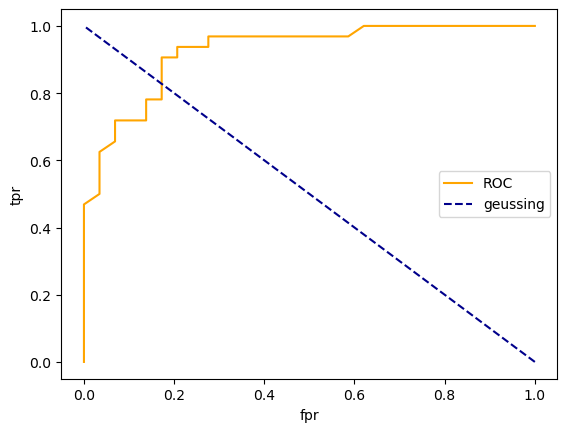

In [52]:
plt.plot(fpr,tpr,color = "orange",label ="ROC")
plt.plot([1,0],[0,1],color = "darkblue", linestyle ="--",label="geussing")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_postive)

np.float64(0.9251077586206896)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
y_preds = clf.predict(x_test)

In [58]:
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]])

In [60]:
pd.crosstab(y_test,y_preds,rownames=["actual label"],colnames=["predicted label"])

predicted label,0,1
actual label,,
0,24,5
1,4,28


In [61]:
import seaborn as sns

In [62]:
sns.set(font_scale=1.5)

In [63]:
conf_mat = confusion_matrix(y_test,y_preds)

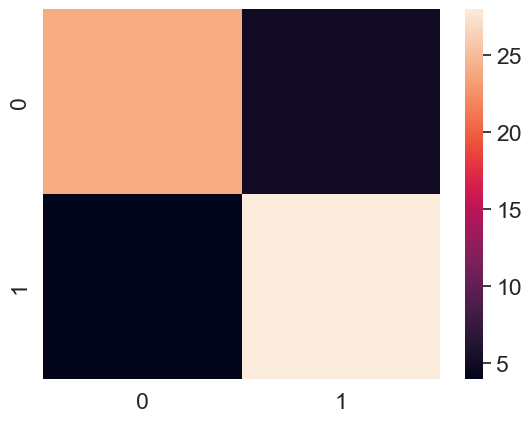

In [65]:
sns.heatmap(conf_mat);

In [72]:
pd.crosstab(y_test,y_preds,rownames=["actual"],colnames=["predicted"])

predicted,0,1
actual,,
0,24,5
1,4,28


In [78]:
mat= confusion_matrix(y_test,
    y_preds)
mat

array([[24,  5],
       [ 4, 28]])

In [80]:
import sklearn
sklearn.__version__

'1.6.1'

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay as cddd

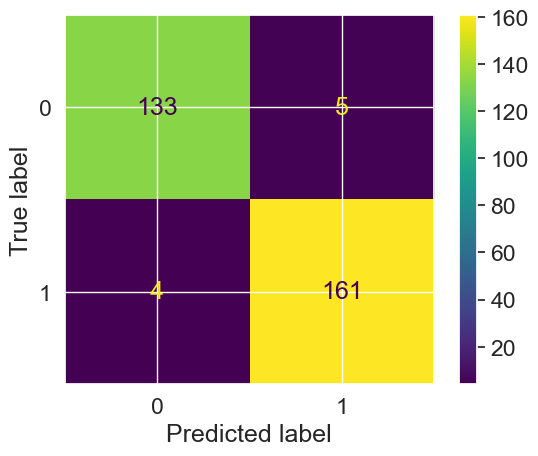

In [87]:
cddd.from_estimator(clf,x,y);

In [89]:
from sklearn.metrics import classification_report as crr

In [94]:
pd.DataFrame(crr(y_test,y_preds,output_dict = True))

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.848485,0.852459,0.852814,0.852601
recall,0.827586,0.875000,0.852459,0.851293,0.852459
f1-score,0.842105,0.861538,0.852459,0.851822,0.852300
support,29.000000,32.000000,0.852459,61.000000,61.000000


In [102]:
from sklearn.ensemble import RandomForestRegressor as RRR

In [103]:
np.random.seed(42)

In [104]:
df = pd.read_csv("heart-disease.csv")
df.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [108]:
model = RRR(n_estimators=100)

In [109]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
model.score(x_test,y_test)

0.5300502155172415

In [112]:
df.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [113]:
y_test.mean()

np.float64(0.5245901639344263)

In [117]:
from sklearn.metrics import mean_absolute_error as maee

In [118]:
y_preds = model.predict(x_test)

In [120]:
mae = maee(y_test,y_preds)
mae

0.23770491803278687

In [122]:
df= pd.DataFrame(data={"actual values ": y_test,
                      "predict values":y_preds})
df

,actual values,predict values
179,0,0.04
228,0,0.65
111,1,0.46
246,0,0.14
60,1,0.89
...,...,...
249,0,0.46
104,1,1.00
300,0,0.10
193,0,0.00


In [127]:
df["differences"] = df["actual values "] - df["predict values"]

In [128]:
df

,actual values,predict values,differences
179,0,0.04,-0.04
228,0,0.65,-0.65
111,1,0.46,0.54
246,0,0.14,-0.14
60,1,0.89,0.11
...,...,...,...
249,0,0.46,-0.46
104,1,1.00,0.00
300,0,0.10,-0.10
193,0,0.00,0.00


In [133]:
df["differences"].mean()

np.float64(0.04688524590163933)

In [134]:
df["squared differences"] = np.square(df["differences"])

In [135]:
df.head()

,actual values,predict values,differences,squared differences
179,0,0.04,-0.04,0.0016
228,0,0.65,-0.65,0.4225
111,1,0.46,0.54,0.2916
246,0,0.14,-0.14,0.0196
60,1,0.89,0.11,0.0121


In [136]:
df["squared differences"].mean()

np.float64(0.11720327868852458)

In [139]:
"finally using scoring parameter"  

'finally using scoring parameter'

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
from sklearn.ensemble import RandomForestClassifier


In [144]:
cross_val_score(clf,x,y,cv =3 ,scoring ="neg_mean_squared_error")

array([-0.1980198 , -0.14851485, -0.21782178])

In [150]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score